# Détection de Faux billets

### Importation des bibliothèques et des données

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from imblearn.over_sampling import SMOTE
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing, decomposition
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split 

In [2]:
data = pd.read_csv("P10_billets.csv", sep=";")

## 1. Vérification des données et Analyse descriptive

In [3]:
data.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

unique: 
 is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64
count: 
 is_genuine      1500
diagonal        1500
height_left     1500
height_right    1500
margin_low      1463
margin_up       1500
length          1500
dtype: int64
null: 
 is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


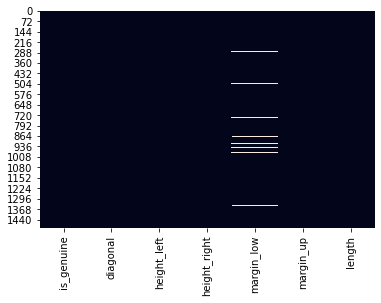

In [4]:
print("unique: \n",data.nunique(axis=0))
print("count: \n",data.count())
print("null: \n",data.isna().sum())
sns.heatmap(data.isna(), cbar=False)
display(data)

In [5]:
print("Nombre de vrais billets :", len(data.loc[data['is_genuine'] == True]))
print("Nombre de faux billets :", len(data.loc[data['is_genuine'] == False]))

Nombre de vrais billets : 1000
Nombre de faux billets : 500


In [6]:
data.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


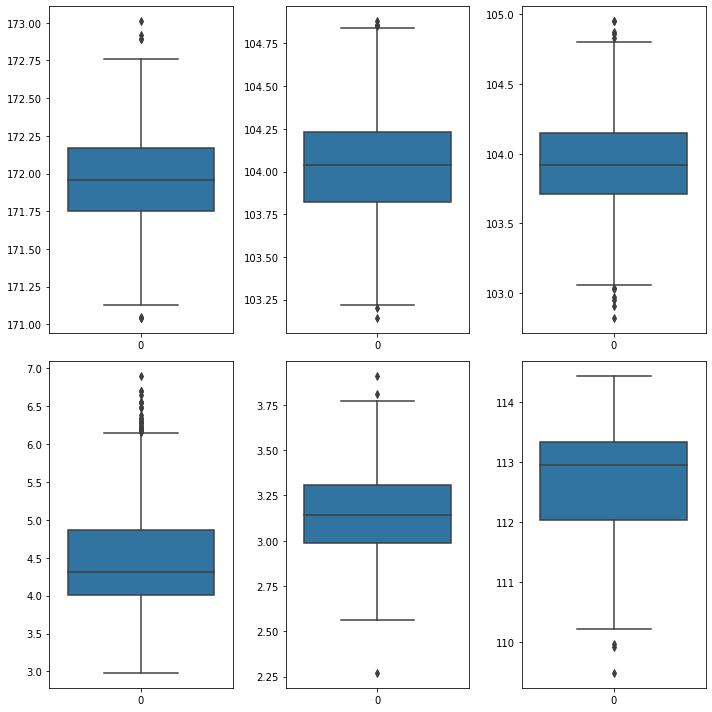

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(10, 10))
sns.boxplot(data=data['diagonal'], ax=ax[0, 0])
sns.boxplot(data=data['height_left'], ax=ax[0, 1])
sns.boxplot(data=data['height_right'], ax=ax[0, 2])
sns.boxplot(data=data['margin_low'], ax=ax[1, 0])
sns.boxplot(data=data['margin_up'], ax=ax[1, 1])
sns.boxplot(data=data['length'], ax=ax[1, 2])
plt.tight_layout()
plt.show()

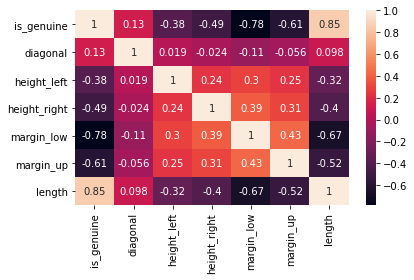

In [8]:
sns.heatmap(data.corr(), annot=True)
plt.tight_layout()
plt.savefig("P10_corr.png", dpi=300)
plt.show()

## 2. Régression linéaire pour valeurs nulles

### 2.1.1 Avec Scikit-learn

Sans considérer les billets vrais/faux

In [9]:
data_train = data.loc[data['margin_low'].notnull()]

X_train = data_train[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_train = data_train['margin_low']

data_test = data.loc[data['margin_low'].isna()]

X_test = data_test[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_test = data_test['margin_low']

In [10]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.4773366973063956

In [11]:
cross_val_score(model, X_train, y_train)

array([-0.61230833, -0.43829044, -0.36620332,  0.33988755, -0.50130462])

En considérant les billets vrais/faux

In [12]:
data_train = data.loc[data['margin_low'].notnull()]

X_train = data_train[['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_train = data_train['margin_low']

data_test = data.loc[data['margin_low'].isna()]

X_test = data_test[['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_test = data_test['margin_low']

In [13]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.616876075567103

In [14]:
cross_val_score(model, X_train, y_train)

array([-0.03181857, -0.0514321 ,  0.0153367 ,  0.49901873,  0.00349927])

### 2.1.2 Avec Statsmodel

Sans considérer les billets vrais/faux

In [15]:
X = data_train[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
X = sm.add_constant(X)
y = data_train['margin_low']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Sat, 02 Apr 2022   Prob (F-statistic):          2.60e-202
Time:                        13:11:01   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.9948      9.656      2.382   

En considérant les billets vrais/faux

In [16]:
data_copy = data_train
data_copy['is_genuine'] = data_train["is_genuine"].astype(int)

X = data_copy[['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
X = sm.add_constant(X)
y = data_copy['margin_low']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Sat, 02 Apr 2022   Prob (F-statistic):          4.75e-299
Time:                        13:11:01   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.8668      8.316      0.345   

<ipython-input-16-8eab661fd664>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy['is_genuine'] = data_train["is_genuine"].astype(int)


### 2.2 Cross validation

In [17]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))

In [18]:
X_train = data_train[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_train = data_train['margin_low']

X_test = data_test[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_test = data_test['margin_low']

In [19]:
model = linear_model.LinearRegression().fit(X_train, y_train)
get_cv_scores(model)

Mean:  -0.3156438300305535
STD:  0.3375795009734092


Méthode Ridge

In [20]:
ridge = linear_model.Ridge(alpha=1).fit(X_train, y_train)
get_cv_scores(ridge)

Mean:  -0.31528566773251054
STD:  0.33732271119477875


In [21]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Best Score:  -0.3134816200793488
Best Params:  {'alpha': 10}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.5s finished


Méthode Lasso

In [22]:
lasso = linear_model.Lasso(alpha=1).fit(X_train, y_train)
get_cv_scores(lasso)

Mean:  -1.9118552564913422
STD:  0.8309015143274179


In [23]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  -0.3154146536364442
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished


Méthode ElasticNet

In [24]:
elastic_net = linear_model.ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train)
get_cv_scores(elastic_net)

Mean:  -1.9118552564913422
STD:  0.8309015143274179


In [25]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  35 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  -0.3153167580082903
Best Params:  {'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.0s finished


### 2.3 Fill NaN

Avec normalisation des données

In [26]:
data_scaled = preprocessing.StandardScaler().fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=['is_genuine','diagonal','height_left','height_right','margin_low','margin_up','length'])

In [27]:
data_train = data_scaled.loc[data_scaled['margin_low'].notnull()]

X_train = data_train[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_train = data_train['margin_low']

data_test = data_scaled.loc[data_scaled['margin_low'].isna()]

X_test = data_test[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_test = data_test['margin_low']

In [28]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.4773366973063955

Sans normalisation des données

In [29]:
data_train = data.loc[data['margin_low'].notnull()]

X_train = data_train[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_train = data_train['margin_low']

data_test = data.loc[data['margin_low'].isna()]

X_test = data_test[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_test = data_test['margin_low']

In [30]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.4773366973063956

In [31]:
y_pred = model.predict(X_test).tolist()
data.loc[data['margin_low'].isna(), 'margin_low'] = y_pred

unique: 
 is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      322
margin_up       123
length          336
dtype: int64
count: 
 is_genuine      1500
diagonal        1500
height_left     1500
height_right    1500
margin_low      1500
margin_up       1500
length          1500
dtype: int64
null: 
 is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


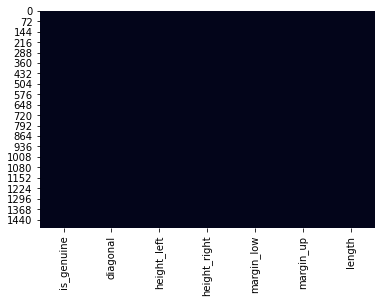

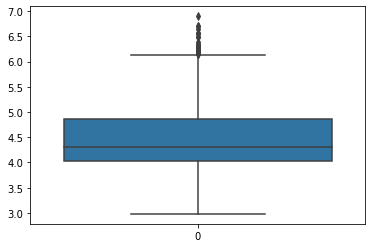

In [32]:
print("unique: \n",data.nunique(axis=0))
print("count: \n",data.count())
print("null: \n",data.isna().sum())

sns.heatmap(data.isna(), cbar=False)
plt.show()

sns.boxplot(data=data['margin_low'])
plt.show()

## 3. ACP (comprendre les liens entre les variables)

In [33]:
X = data.values
index = data.index
n = X.shape[0]
p = X.shape[1]

X_scaled = preprocessing.StandardScaler().fit_transform(X)

pca = decomposition.PCA()
coord = pca.fit_transform(X_scaled)
valprop = (n-1)/n*pca.explained_variance_

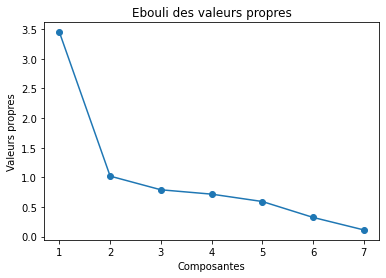

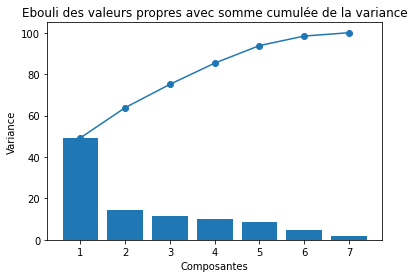

,Val.Propre,Seuils,Var.ratio,Var.sum
0,3.447457,2.592857,49.25,49.249385
1,1.019941,1.592857,14.57,63.819976
2,0.789391,1.092857,11.28,75.096989
3,0.715920,0.759524,10.23,85.324421
4,0.591501,0.509524,8.45,93.774436
5,0.323439,0.309524,4.62,98.394991
6,0.112351,0.142857,1.61,100.000000


In [34]:
# Scree plot
plt.plot(np.arange(1,p+1),valprop, marker='o')
plt.title("Ebouli des valeurs propres")
plt.ylabel("Valeurs propres")
plt.xlabel("Composantes")
plt.savefig("P10_ACP_screeplot.png", dpi=300)
plt.show()

scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),marker='o')
plt.title("Ebouli des valeurs propres avec somme cumulée de la variance")
plt.ylabel("Variance")
plt.xlabel("Composantes")
plt.show()

# Seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
ratio = np.around(100*pca.explained_variance_ratio_, decimals=2)
var_sum = np.cumsum(100*pca.explained_variance_ratio_)

all_values = pd.DataFrame({'Val.Propre':valprop,'Seuils':bs, 'Var.ratio':ratio, 'Var.sum':var_sum})
display(all_values)

,id,COR_1,COR_2
0,is_genuine,-0.943750,0.045253
1,diagonal,-0.141371,0.938457
2,height_left,0.493968,0.337725
3,height_right,0.601072,0.134747
4,margin_low,0.829843,-0.059009
5,margin_up,0.694819,0.012250
6,length,-0.871839,0.036686


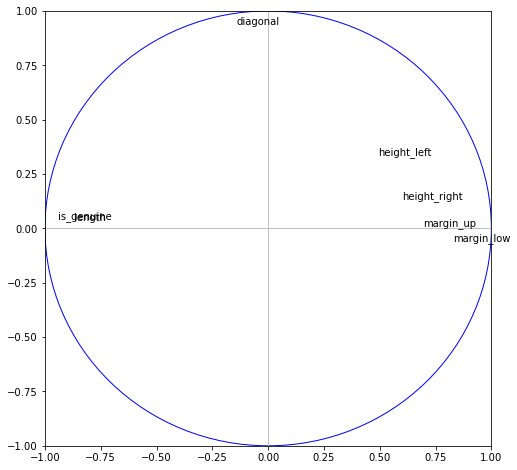

In [35]:
sqrt_valprop = np.sqrt(valprop)

corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:]*sqrt_valprop[k]
    
cor_var_df = pd.DataFrame({'id':data.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})
display(cor_var_df)
    
    
def cercle_corr(df, shape, var, corvar, name):
    fig, axes = plt.subplots(figsize=(8,8))
    axes.set_xlim(-1,1)
    axes.set_ylim(-1,1)
    for i in range(shape):
        plt.annotate(df.columns[i],(corvar[i,var[0]],corvar[i,var[1]]))
    plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
    plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
    cercle = plt.Circle((0,0),1,color='blue',fill=False)
    axes.add_artist(cercle)
    plt.savefig(name, dpi=300)
    plt.show()
    
cercle_corr(data, p, (0,1), corvar, "P10_ACP_corrcircle.png")

## 4. Clustering

In [36]:
data = data.set_index('is_genuine')
X = data.values
output = data.index

X_scaled = preprocessing.StandardScaler().fit_transform(X)

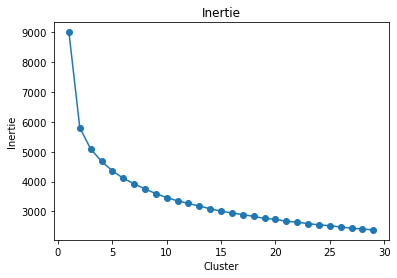

---------------------------------------
KMeans(n_clusters=2, random_state=10)
Silhouette score: 0.34274740691324784
---------------------------------------
KMeans(n_clusters=3, random_state=10)
Silhouette score: 0.20886716061037666
---------------------------------------
KMeans(n_clusters=4, random_state=10)
Silhouette score: 0.19603251491332593
---------------------------------------
KMeans(n_clusters=5, random_state=10)
Silhouette score: 0.1564824792954774
---------------------------------------
KMeans(n_clusters=6, random_state=10)
Silhouette score: 0.15099114224983934
---------------------------------------
KMeans(n_clusters=7, random_state=10)
Silhouette score: 0.14774426478139693
---------------------------------------
KMeans(random_state=10)
Silhouette score: 0.14136314221522378


In [37]:
clusters= []
inertia = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k, random_state=10)
    km = km.fit(X_scaled)
    clusters.append(km)
    inertia.append(km.inertia_)

# Méthode du coude
plt.plot(K, inertia, marker='o')
plt.title("Inertie")
plt.xlabel('Cluster')
plt.ylabel('Inertie')
plt.show()

# Coefficient de silhouette
for i in range(1,8,1):
    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",metrics.silhouette_score(X_scaled, clusters[i].predict(X_scaled)))

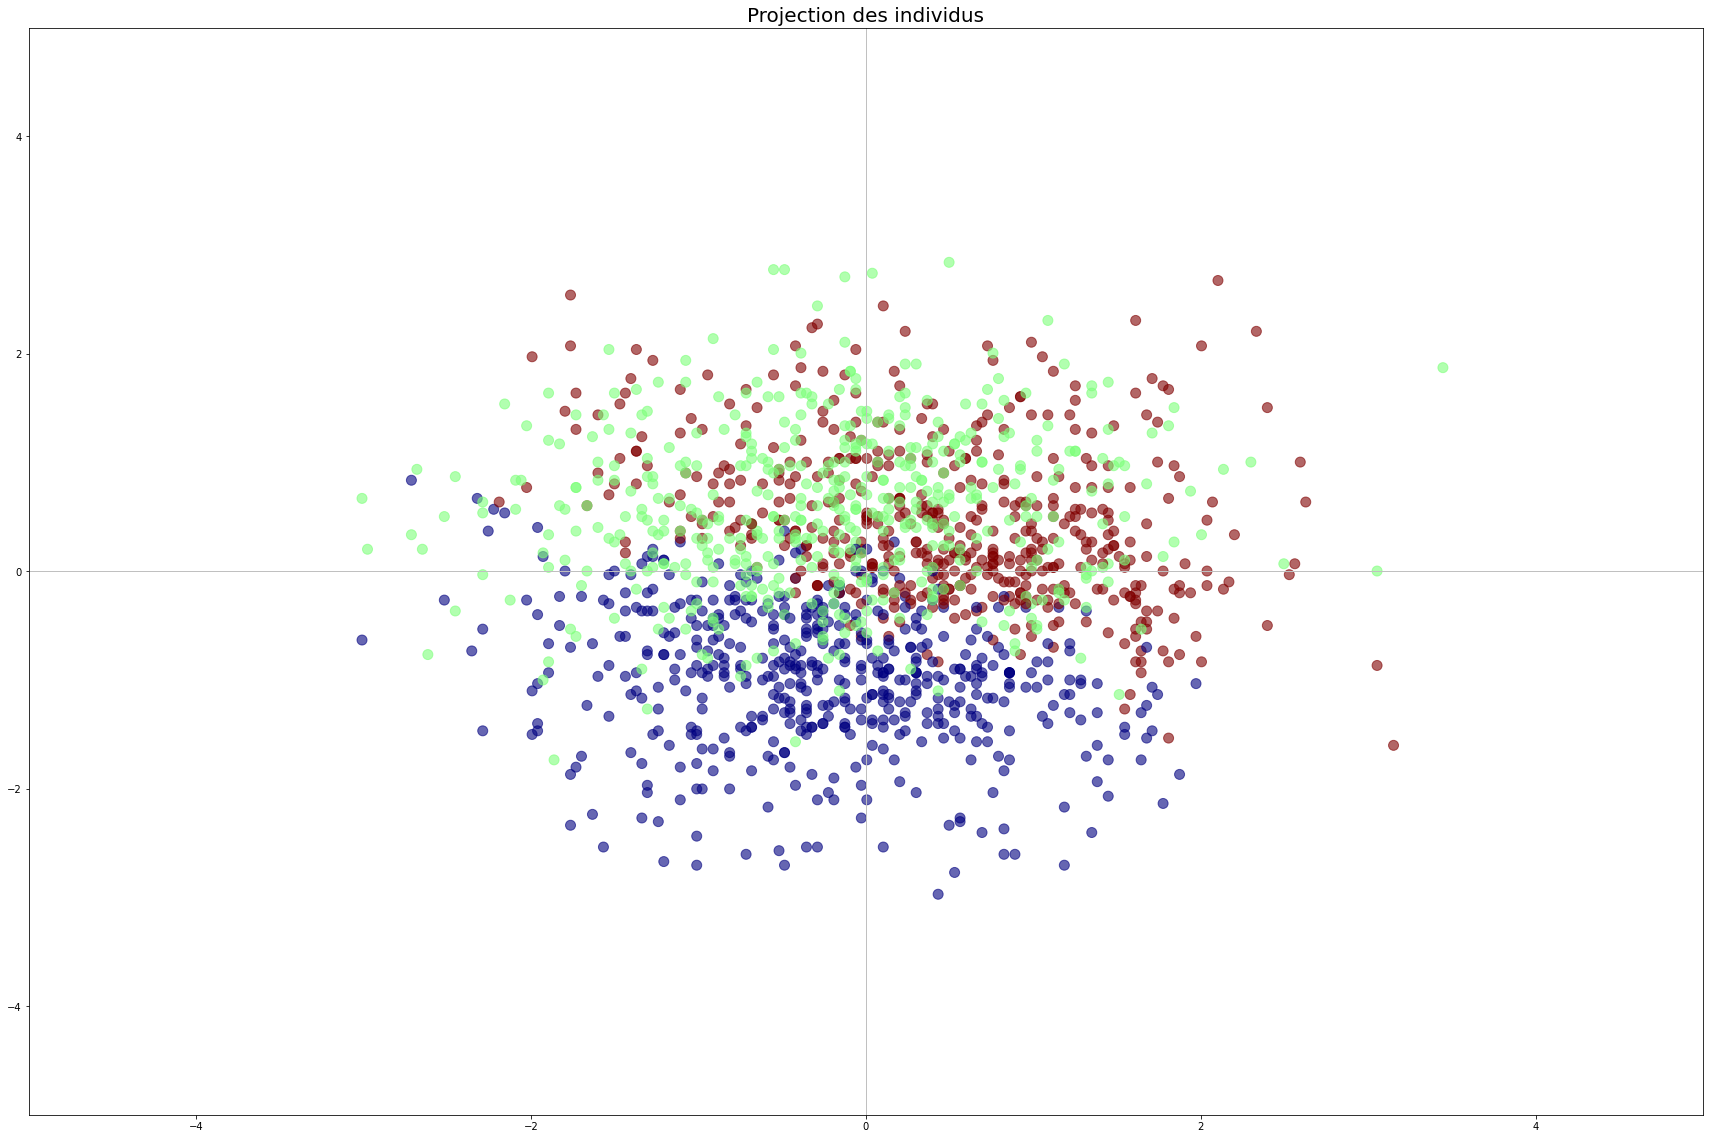

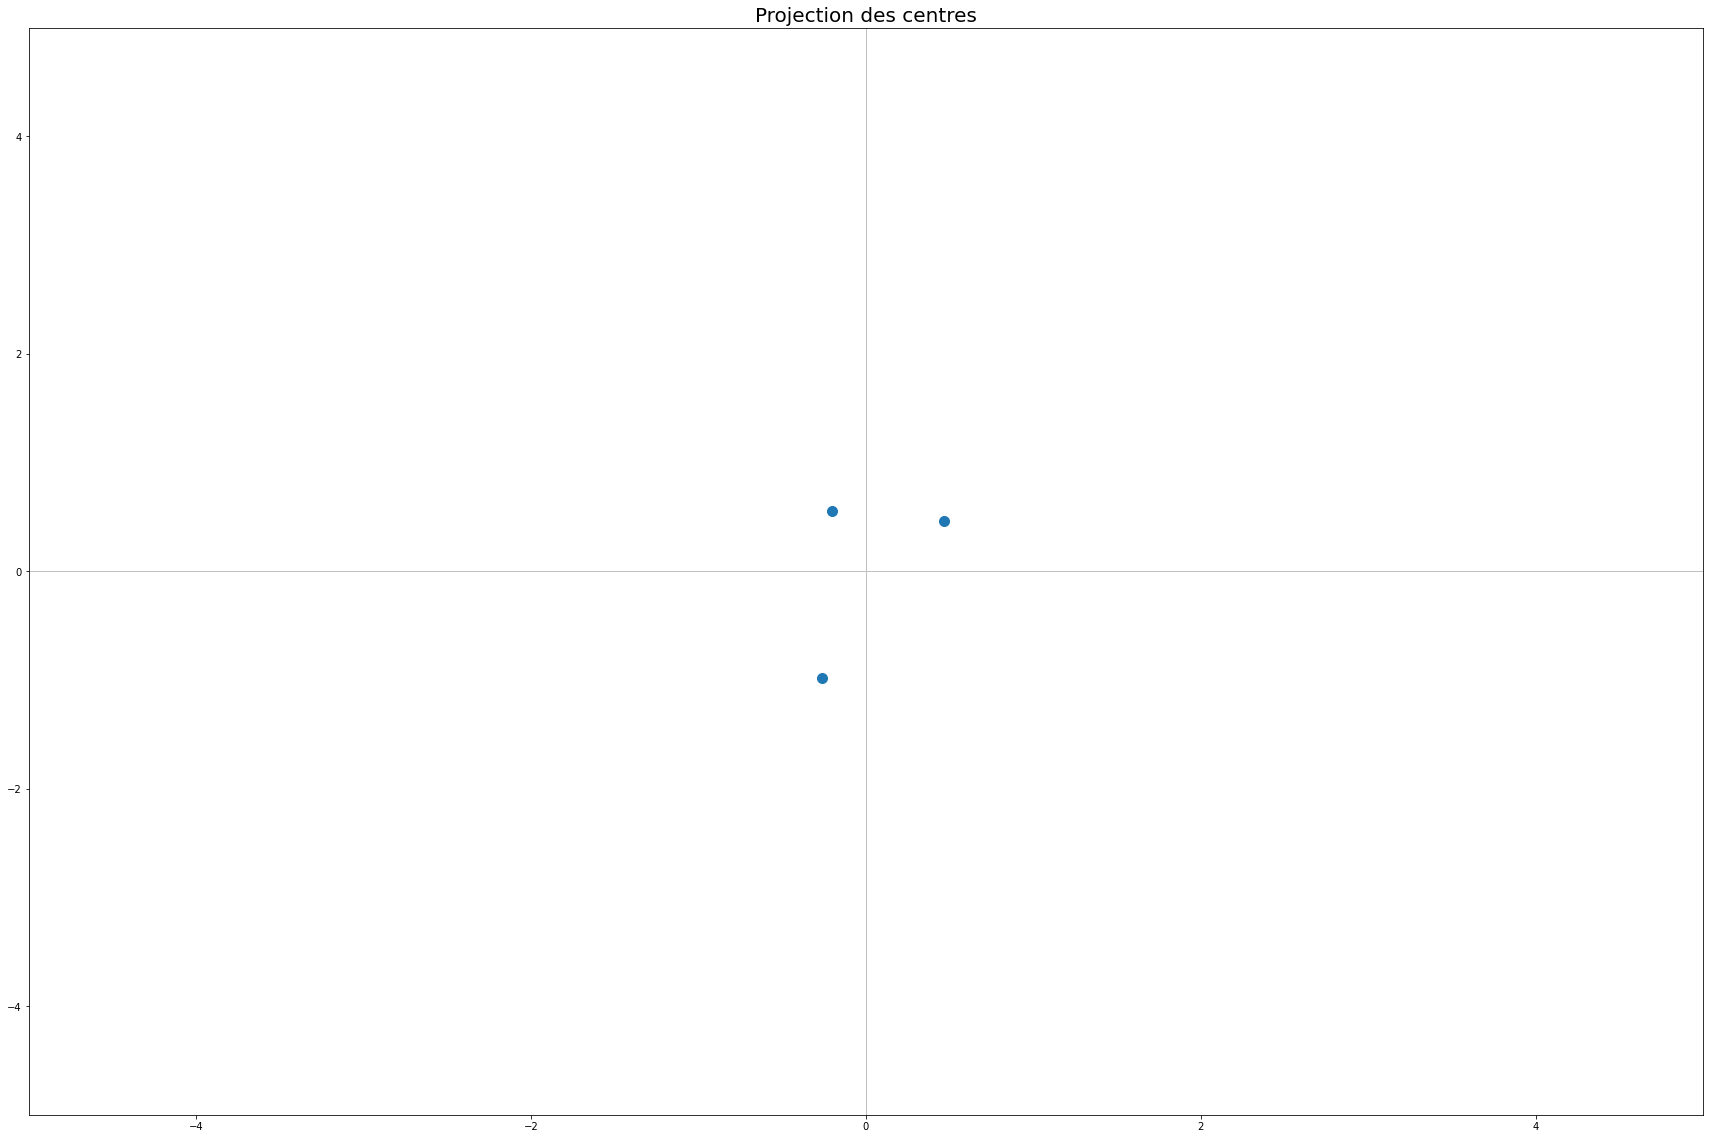

In [38]:
n_clust = 3

km = KMeans(n_clusters=n_clust, random_state=10)
km.fit(X_scaled)

clusters = km.labels_

fig, axes = plt.subplots(figsize=(30,20))
axes.set_xlim(-5,5)
axes.set_ylim(-5,5)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=100, c=clusters.astype(float), cmap = 'jet', alpha=0.6)
plt.plot([-5,5],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-5,5],color='silver',linestyle='-',linewidth=1)
plt.title("Projection des individus", fontsize=20)
plt.savefig("P10_kmeans_ind.png", dpi=300)
plt.show()


fig, axes = plt.subplots(figsize=(30,20))
axes.set_xlim(-5,5)
axes.set_ylim(-5,5)
centroids = km.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1], s=100)
plt.plot([-5,5],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-5,5],color='silver',linestyle='-',linewidth=1)
plt.title("Projection des centres", fontsize=20)
plt.savefig("P10_kmeans_centroids.png", dpi=300)
plt.show()

cluster,0,1,2
id,,,
False,4,484,12
True,507,4,489


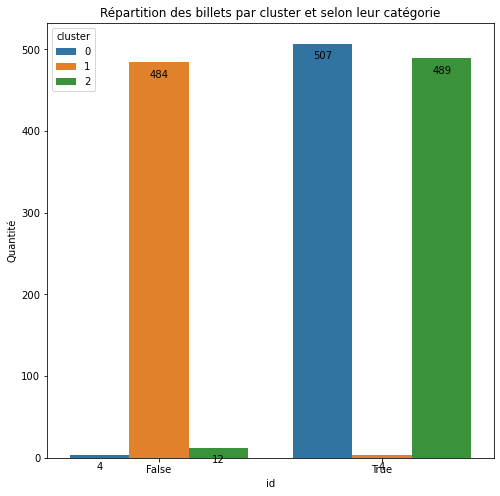

In [39]:
clust = pd.DataFrame({'id':output, 'cluster':clusters})
df = pd.crosstab(clust['id'], clust['cluster'])
display(df)

stacked = df.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(8,8))
graph = sns.barplot(x=stacked['id'], y=stacked['value'], hue=stacked['cluster'])
for p in graph.patches: 
    graph.annotate(format(round(p.get_height())),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, -12), 
                   textcoords='offset points')
plt.ylabel("Quantité")
plt.title("Répartition des billets par cluster et selon leur catégorie")
plt.savefig("P10_kmeans_barplot.png", dpi=300)
plt.show()

## 5. Regression Logistique

In [40]:
data = data.reset_index()

In [41]:
X = data[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
y = data['is_genuine']
#False = 0, True = 1

### 5.1 Modélisation avec normalisation des données

Pas de normalisation

In [42]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, train_size=0.8, random_state=42)

In [43]:
lt_nonorm = linear_model.LogisticRegression()
model_nonorm = lt_nonorm.fit(X_train,y_train)
model_nonorm.score(X_train, y_train)

0.9891666666666666

              precision    recall  f1-score   support

       False       1.00      0.97      0.99       110
        True       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



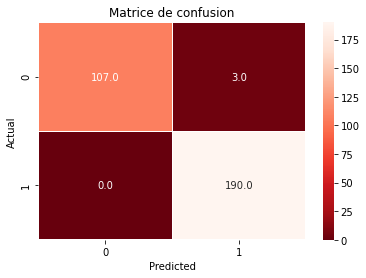

In [44]:
y_pred_nonorm = model_nonorm.predict(X_test)
mc_nonorm = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_nonorm))

print(metrics.classification_report(y_test,y_pred_nonorm))

sns.heatmap(mc_nonorm,annot=True,fmt="0.1f",linewidths=.1, cmap='Reds_r')
plt.title('Matrice de confusion')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Données normalisées

In [45]:
X = data[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
y = data['is_genuine']
#False = 0, True = 1

In [46]:
X_scaled = preprocessing.StandardScaler().fit_transform(X)

In [47]:
(X_train, X_test, y_train, y_test) = train_test_split(X_scaled, y, train_size=0.8, random_state=42)

In [48]:
lt_scaled = linear_model.LogisticRegression()
model_scaled = lt_scaled.fit(X_train,y_train)
model_scaled.score(X_train, y_train)

0.9908333333333333

              precision    recall  f1-score   support

       False       1.00      0.98      0.99       110
        True       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



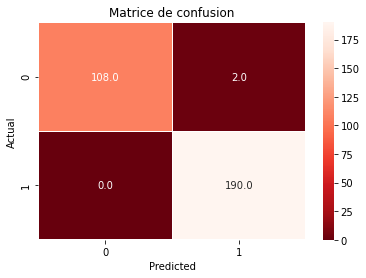

In [49]:
y_pred_scaled = model_scaled.predict(X_test)
mc_scaled = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_scaled))

print(metrics.classification_report(y_test,y_pred_scaled))

sns.heatmap(mc_scaled,annot=True,fmt="0.1f",linewidths=.1, cmap='Reds_r')
plt.title('Matrice de confusion')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 5.2 Vérification de la qualité du modèle

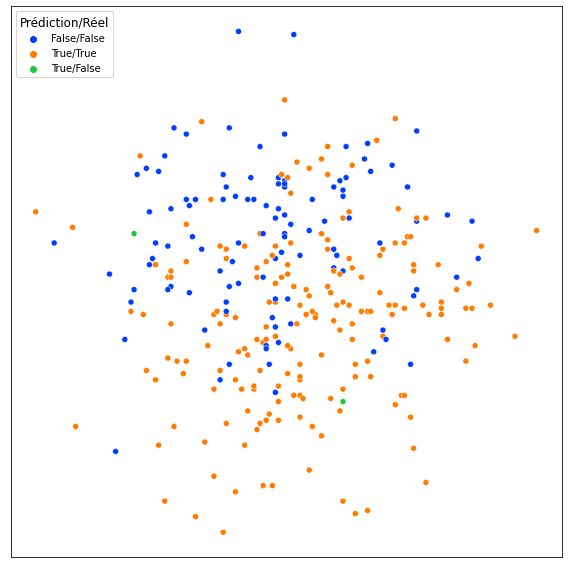

In [50]:
y_comparison = ["Correct" if a==i else "Incorrect" for a, i in zip(y_pred_scaled, y_test)]
y_pred_hue = ["True/True" if a==True and i==True 
               else "False/False" if a== False and i== False
               else "True/False" if a== True and i==False else 3 for a,i in zip(y_pred_scaled, y_test)]

plt.figure(figsize=(8,8))
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_pred_hue, palette='bright')
plt.xticks([], [])
plt.yticks([],[])
plt.xlabel('')
plt.ylabel('')
plt.legend(loc=2, title="Prédiction/Réel", title_fontsize='large')
plt.tight_layout()
plt.savefig("P10_logreg_scatterplot.png", dpi=300)
plt.show()

Features importance

Feature: 0, Score: 0.07682
Feature: 1, Score: -0.47373
Feature: 2, Score: -0.68692
Feature: 3, Score: -2.55879
Feature: 4, Score: -1.55956
Feature: 5, Score: 3.51377


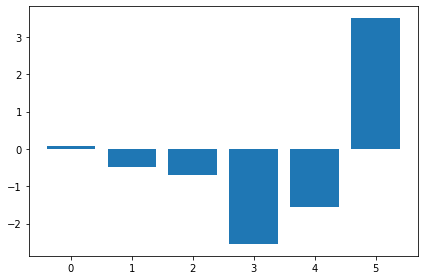

In [51]:
importance = model_scaled.coef_[0]

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
plt.bar([x for x in range(len(importance))], importance)
plt.tight_layout()
plt.savefig("P10_logreg_featimp.png", dpi=300)
plt.show()

Courbe ROC

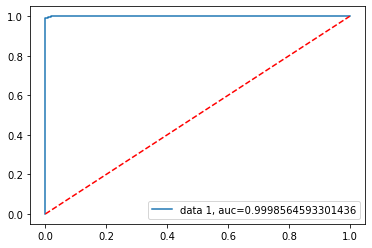

In [52]:
y_pred_proba = model_scaled.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0.0, 1.0], [0.0, 1.0], 'r--')
plt.legend(loc=4)
plt.savefig("P10_logreg_ROC.png", dpi=300)
plt.show()

Cross-validation et learning curve

In [53]:
print("Scores de cross-validation sur le train set: ", cross_val_score(model_scaled, X_train, y_train))

Scores de cross-validation sur le train set:  [0.9875     0.99166667 0.9875     0.9875     0.99166667]


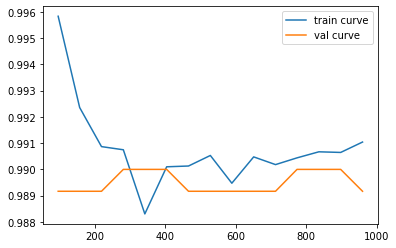

In [54]:
N, train_scores, val_scores = learning_curve(model_scaled, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 15))

plt.plot(N, train_scores.mean(axis=1), label="train curve")
plt.plot(N, val_scores.mean(axis=1), label="val curve")
plt.legend()
plt.savefig("P10_logreg_train_val_curves.png", dpi=300)
plt.show()

### 5.3 Test avec l'Oversampling

In [55]:
oversample = SMOTE()
X_train_adjusted, y_train_adjusted = oversample.fit_resample(np.array(X_train), y_train)

In [56]:
print("Nombre d'invidus pour chaque catégorie avant Oversampling :")
print(pd.DataFrame(y_train).value_counts())

print("\nNombre d'invidus pour chaque catégorie après Oversampling :")
print(pd.DataFrame(y_train_adjusted).value_counts())

Nombre d'invidus pour chaque catégorie avant Oversampling :
is_genuine
True          810
False         390
dtype: int64

Nombre d'invidus pour chaque catégorie après Oversampling :
is_genuine
True          810
False         810
dtype: int64


In [57]:
lt2 = linear_model.LogisticRegression()
model_adjusted = lt2.fit(X_train_adjusted,y_train_adjusted)

              precision    recall  f1-score   support

       False       0.99      0.98      0.99       110
        True       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



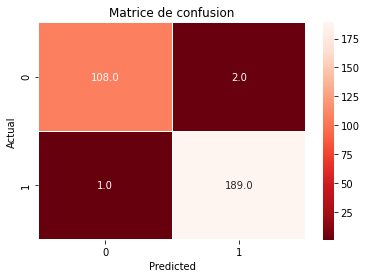

In [58]:
y_pred_adjusted = model_adjusted.predict(X_test)
mc_adjusted = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred_adjusted))


print(metrics.classification_report(y_test,y_pred_adjusted))

sns.heatmap(mc_adjusted,annot=True,fmt="0.1f",linewidths=.1, cmap='Reds_r')
plt.title('Matrice de confusion')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

--> Pas d'amélioration par rapport à la modélisation sans oversampling

## 6. Utilisation des centroïdes K-means

In [59]:
X = data[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
y = data['is_genuine']
#False = 0, True = 1

In [60]:
X_scaled = preprocessing.StandardScaler().fit_transform(X)

In [61]:
(X_train, X_test, y_train, y_test) = train_test_split(X_scaled, y, train_size=0.8, random_state=42)

In [62]:
n_clust = 3

km = KMeans(n_clusters=n_clust, random_state=10)
km.fit(X_train)

clusters = km.labels_

cluster,0,1,2
id,,,
False,3,377,10
True,402,4,404


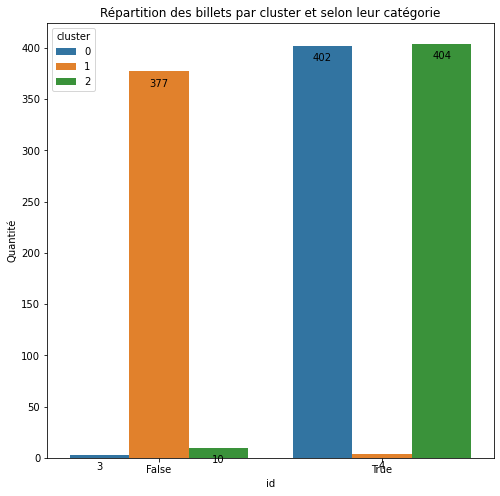

In [63]:
clust = pd.DataFrame({'id':y_train, 'cluster':clusters})
df = pd.crosstab(clust['id'], clust['cluster'])
display(df)

stacked = df.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(8,8))
graph = sns.barplot(x=stacked['id'], y=stacked['value'], hue=stacked['cluster'])
for p in graph.patches: 
    graph.annotate(format(round(p.get_height())),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', 
                   xytext=(0, -12), 
                   textcoords='offset points')
plt.ylabel("Quantité")
plt.title("Répartition des billets par cluster et selon leur catégorie")
plt.show()

In [64]:
cluster_pred_km = km.predict(X_test)

y_pred_km = [True if i == 0 or i == 2 else False for i in cluster_pred_km]

              precision    recall  f1-score   support

       False       1.00      0.97      0.99       110
        True       0.98      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



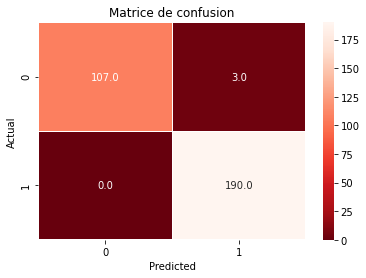

In [65]:
mc_km = pd.DataFrame(metrics.confusion_matrix(np.array(y_test),np.array(y_pred_km)))


print(metrics.classification_report(y_test,y_pred_km))

sns.heatmap(mc_km,annot=True,fmt="0.1f",linewidths=.1, cmap='Reds_r')
plt.title('Matrice de confusion')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 7. Algorithme

In [66]:
test = pd.read_csv("P10_billets_production.csv")

### Utilisation de la régression logistique

In [67]:
def billet_predict_logreg(df):
    X = df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
    X_scaled = preprocessing.StandardScaler().fit_transform(X)
    y = model_scaled.predict(X_scaled)
    df['is_genuine'] = y
    return y, df

In [68]:
def score(actual, predicted):
    acc = metrics.classification_report(actual,predicted)
    mc = pd.DataFrame(metrics.confusion_matrix(actual, predicted))
    heatmap = sns.heatmap(mc,annot=True,fmt="0.1f",linewidths=.1, cmap='Reds_r')
    plt.title('Matrice de confusion')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return acc, heatmap

Test de l'algorithme

In [69]:
billet_predict_logreg(test)[1]

,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True


Sauvegarde du modèle

In [70]:
import joblib

logreg_model = 'logreg_model.pkl'
joblib.dump(model_scaled, logreg_model)

['logreg_model.pkl']